# LightGBM: Credit Score 예측모델 만들기

## 데이터 살펴보기

In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://github.com/DSNote/fastcampus/raw/main/credit.csv'

In [3]:
credit_df = pd.read_csv(url)
credit_df.head()

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3,4,3,...,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,Good
1,0x160e,CUS_0x21b1,Rick Rothackerj,28_,004-07-5839,_______,34847.84,2,4,6,...,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,Standard
2,0x161a,CUS_0x2dbc,Langep,34,486-85-3974,_______,143162.64,1,5,8,...,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,Good
3,0x1626,CUS_0xb891,Jasond,54,072-31-6145,Entrepreneur,30689.89,2,5,4,...,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,Standard
4,0x1632,CUS_0x1cdb,Deepaa,21,615-06-7821,Developer,35547.71_,7,5,5,...,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,Standard


In [4]:
credit_df = credit_df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1)
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [5]:
credit_df['Credit_Score'].value_counts()

Standard    6943
Poor        3582
Good        1975
Name: Credit_Score, dtype: int64

In [6]:
credit_df['Credit_Score'] = credit_df['Credit_Score'].replace({'Poor':0, 'Standard':1, 'Good':2})
credit_df['Credit_Score'].head()

0    2
1    1
2    2
3    1
4    1
Name: Credit_Score, dtype: int64

In [7]:
credit_df.describe()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Score
count,12500.000000,12500.000000,12500.00000,12500.000000,12264.000000,12500.000000,12500.000000,12366.000000,12500.000000
mean,17.275120,21.647680,69.46520,21.051440,24.591650,32.291949,1303.781040,405.815391,0.871440
std,118.518214,123.789969,455.95698,14.859994,183.422458,5.084327,8118.261086,218.136964,0.654268
min,0.000000,1.000000,1.00000,-5.000000,0.000000,20.992914,0.000000,0.088628,0.000000
25%,3.000000,4.000000,8.00000,10.000000,2.000000,28.110034,29.128806,271.785749,0.000000
50%,6.000000,5.000000,13.00000,18.000000,4.000000,32.297912,66.372879,337.169588,1.000000
75%,7.000000,7.000000,20.00000,28.000000,8.000000,36.458660,149.904496,475.222487,1.000000
max,1779.000000,1479.000000,5788.00000,67.000000,2592.000000,49.564519,82122.000000,1602.040519,2.000000


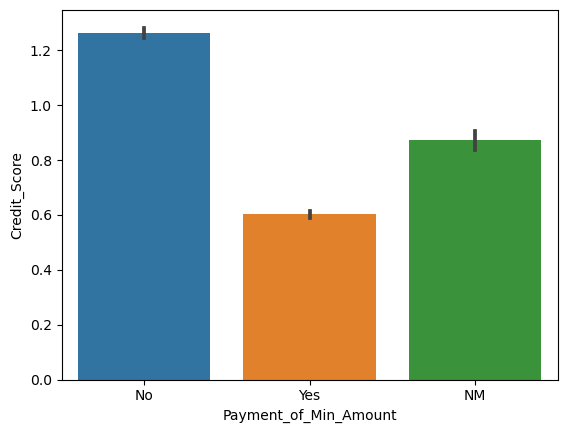

In [8]:
sns.barplot(data=credit_df, x='Payment_of_Min_Amount', y='Credit_Score')
plt.show()

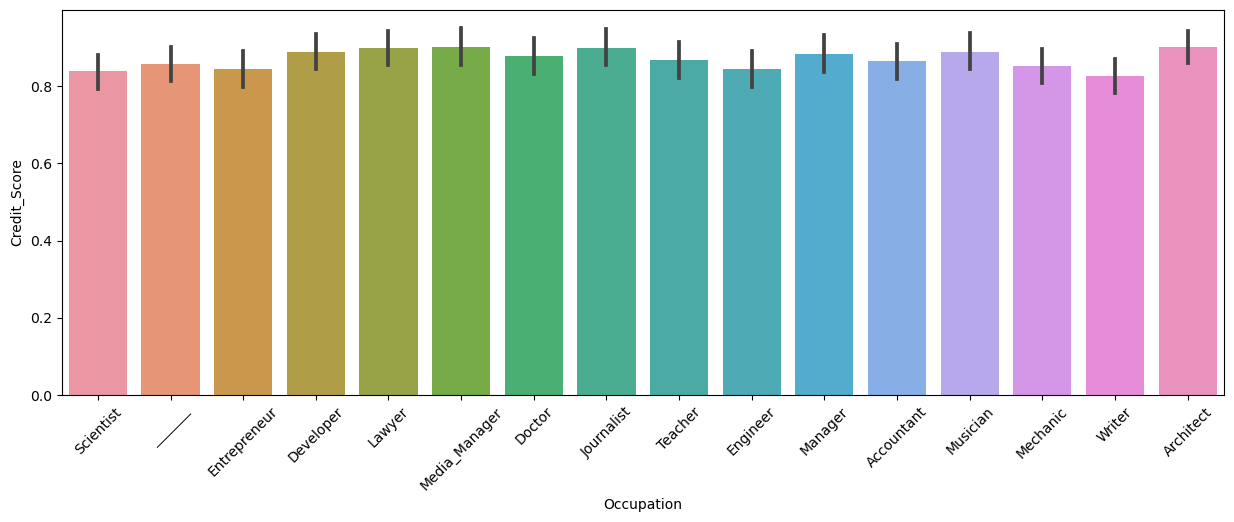

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(data=credit_df, x='Occupation', y='Credit_Score')
plt.xticks(rotation=45)
plt.show()

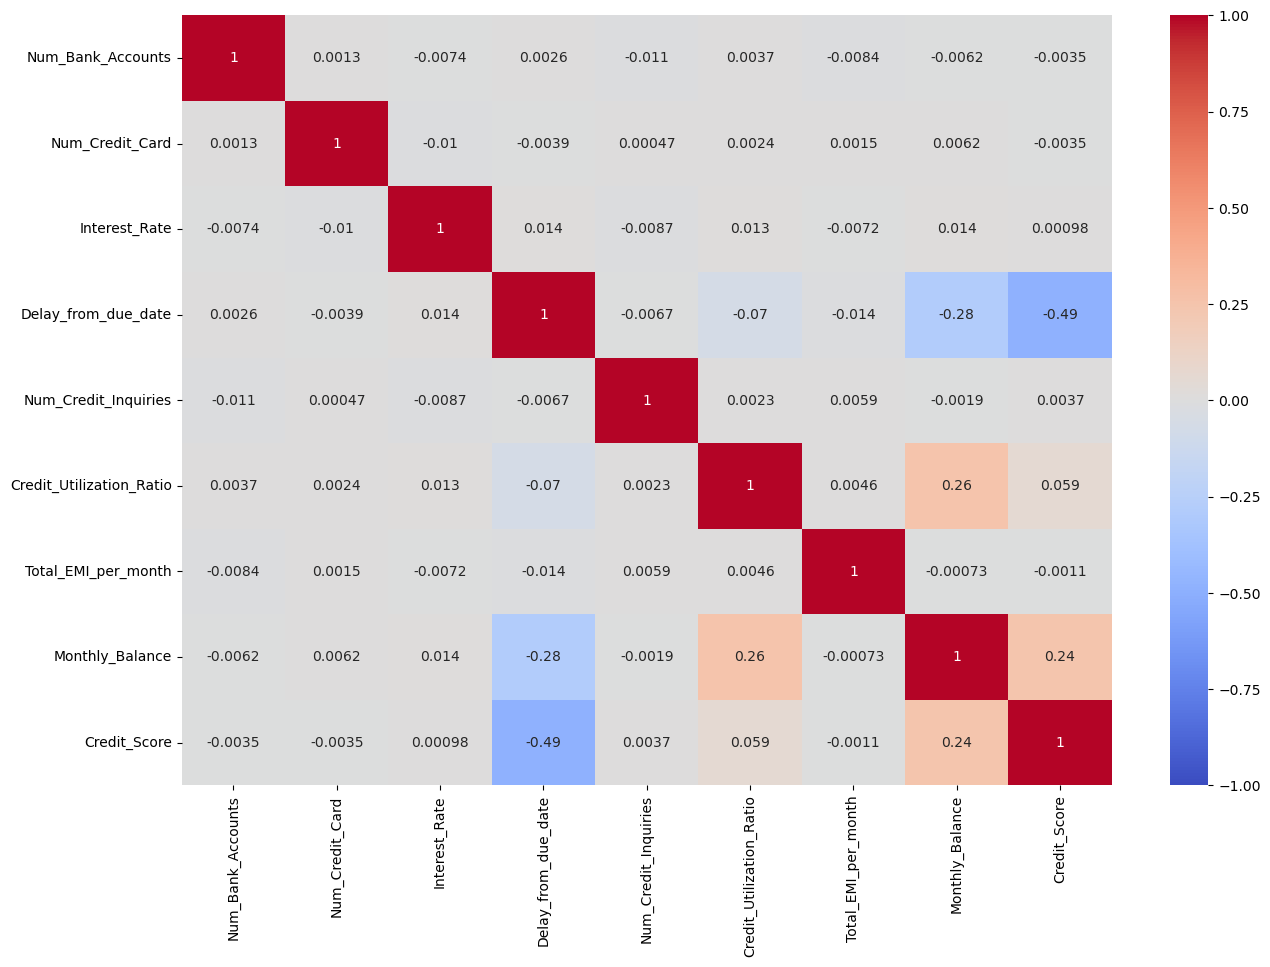

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(credit_df.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

In [11]:
## Data Cleaning - 숫자 데이터 처리

In [12]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [13]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,2
1,28_,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,1
4,21,Developer,35547.71_,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,1


In [14]:
list(credit_df.columns[credit_df.dtypes=='object'])

['Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour']

In [15]:
numeric_objs = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly']

In [16]:
# series 데이터를 만들어 추출 테스트
series = pd.Series(['5.5 g', '1.1', '1.5', '2', 'abc' ])
series.str.extract(r'([0-9]+.?[0-9]?)')

,0
0,5.5
1,1.1
2,1.5
3,2
4,NaN


In [17]:
series = pd.Series(['5.5 g', '1.1', '1.5', '2', 'abc', '1.', '23'])
series.str.extract(r'(\d+.\d+|\d+)')

,0
0,5.5
1,1.1
2,1.5
3,2
4,NaN
5,1
6,23


In [18]:
for o_name in numeric_objs:
    credit_df[o_name] = pd.to_numeric(credit_df[o_name].str.extract(r'(\d+.\d+|\d+)', expand=False))
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  float64
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  int64  
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  float64
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  float64
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [19]:
credit_df['Credit_History_Age']

0        22 Years and 1 Months
1        26 Years and 7 Months
2        17 Years and 9 Months
3        17 Years and 3 Months
4        30 Years and 8 Months
                 ...          
12495    28 Years and 1 Months
12496                      NaN
12497    29 Years and 9 Months
12498     5 Years and 8 Months
12499    31 Years and 3 Months
Name: Credit_History_Age, Length: 12500, dtype: object

In [20]:
import re
def get_month(s):
    if isinstance(s,str):
        year, month = re.findall('\d+', s)
        return int(year)*12+int(month)
    else:
        return np.NaN

credit_df['Credit_History_Age'] = credit_df['Credit_History_Age'].apply(get_month)

In [21]:
## Data Cleaning - 이상 데이터 처리

In [22]:
## Data Cleaning - 이상 데이터 처리

In [23]:
## 결측치 처리

In [24]:
## 텍스트 데이터 변환

In [25]:
## 더미 변수 만들기

In [26]:
## LightGBM 알고리즘으로 모델링하기

In [27]:
## 그리드 서치

In [28]:
## LightGBM 알고리즘의 이해

In [29]:
## LightGBM 알고리즘의 이해

In [30]:
## LightGBM 알고리즘의 이해

In [31]:
## LightGBM 알고리즘의 이해

In [32]:
## LightGBM 알고리즘의 이해

In [33]:
## LightGBM 알고리즘의 이해

In [34]:
## 그리드 서치

In [35]:
## 그리드 서치

In [36]:
## 그리드 서치

In [37]:
## 그리드 서치

In [38]:
## LightGBM 알고리즘으로 모델링하기

In [39]:
## LightGBM 알고리즘으로 모델링하기

In [40]:
## LightGBM 알고리즘으로 모델링하기

In [41]:
## LightGBM 알고리즘으로 모델링하기

In [42]:
## 더미 변수 만들기

In [43]:
## 더미 변수 만들기

In [44]:
## 더미 변수 만들기

In [45]:
## 더미 변수 만들기

In [46]:
## 더미 변수 만들기

In [47]:
## 텍스트 데이터 변환

In [48]:
## 텍스트 데이터 변환

In [49]:
## 텍스트 데이터 변환

In [50]:
## 텍스트 데이터 변환

In [51]:
## 결측치 처리

In [52]:
## 결측치 처리

In [53]:
## 결측치 처리

In [54]:
## 결측치 처리

In [55]:
## Data Cleaning - 이상 데이터 처리

In [56]:
## Data Cleaning - 이상 데이터 처리

In [57]:
## Data Cleaning - 이상 데이터 처리

In [58]:
## Data Cleaning - 이상 데이터 처리

In [59]:
## Data Cleaning - 숫자 데이터 처리

## Data Cleaning - 숫자 데이터 처리

## Data Cleaning - 이상 데이터 처리

## 결측치 처리

## 텍스트 데이터 변환

## 더미 변수 만들기

## LightGBM 알고리즘으로 모델링하기

## 그리드 서치

## LightGBM 알고리즘의 이해

## LightGBM 알고리즘의 이해

## 그리드 서치
## LightGBM 알고리즘의 이해

## LightGBM 알고리즘으로 모델링하기
## 그리드 서치
## LightGBM 알고리즘의 이해

## 더미 변수 만들기
## LightGBM 알고리즘으로 모델링하기
## 그리드 서치
## LightGBM 알고리즘의 이해

## 텍스트 데이터 변환
## 더미 변수 만들기
## LightGBM 알고리즘으로 모델링하기
## 그리드 서치
## LightGBM 알고리즘의 이해

## 결측치 처리
## 텍스트 데이터 변환
## 더미 변수 만들기
## LightGBM 알고리즘으로 모델링하기
## 그리드 서치
## LightGBM 알고리즘의 이해

## Data Cleaning - 이상 데이터 처리
## 결측치 처리
## 텍스트 데이터 변환
## 더미 변수 만들기
## LightGBM 알고리즘으로 모델링하기
## 그리드 서치
## LightGBM 알고리즘의 이해

## Data Cleaning - 숫자 데이터 처리
## Data Cleaning - 이상 데이터 처리
## 결측치 처리
## 텍스트 데이터 변환
## 더미 변수 만들기
## LightGBM 알고리즘으로 모델링하기
## 그리드 서치
## LightGBM 알고리즘의 이해